<a href="https://colab.research.google.com/github/gregoryrcurlewis/hello-world/blob/main/GoodDailyMLFuncitonsGoldSep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tulipy
!pip install pandas 
!pip install yfinance 
!pip install sklearn
!pip install scipy
!pip install oandapyV20

import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
import yfinance as yf
import sklearn
import pandas as pd
import numpy as np
import scipy
import tulipy as ti
import oandapyV20
from oandapyV20 import API
import oandapyV20.endpoints.pricing as pricing

import joblib
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
#from sklearn.cross_validation import StratifiedKFold
#from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
#from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
#from sklearn.cross_validation import train_test_split
#import scikitplot as skplt
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import xgboost as xgb
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

print('end')

     |████████████████████████████████| 110 kB 8.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for tulipy: filename=tulipy-0.4.0-cp37-cp37m-linux_x86_64.whl size=227810 sha256=dcd438fb4b6d0eabae4f65ceb833a9a60209711f13a8b6486d307b224db4643c
  Stored in directory: /root/.cache/pip/wheels/fc/60/0d/fab20b1e548494f985f44e485f9a48d00b5bc0e39a9c6f018e
Successfully built tulipy
     |████████████████████████████████| 6.3 MB 9.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=091e61d32e47969a96aba6a8b4c28c3c588484478f838ab6de58161dafd302c0
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |█████████████████████

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



end


In [2]:
#from sklearn import gradient_boosting



[*********************100%***********************]  1 of 1 completed
GBPUSD=X S25:  0.1439107892951208
GBPUSD=X S50:  0.2902763734411895
GBPUSD=X S75:  0.49575145312075186

GBPUSD=X SM25:  -0.14471780028944004
GBPUSD=X SM50:  -0.28797696184305055
GBPUSD=X SM75:  -0.5097397193323805

GBPUSD=X SC25:  0.0
GBPUSD=X SC50:  0.0
GBPUSD=X SC75:  0.0
done


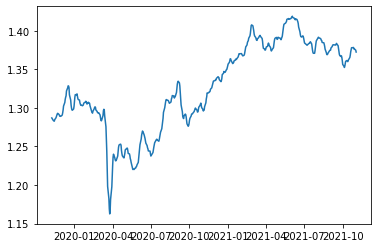

In [3]:

#ticker = 'LTHM'
#tickers = 'DARK.L'
#tickers = 'TSLA'
#tickers="PA=F"
#tickers = "IAG.L"
tickers = 'GBPUSD=X'

import warnings
warnings.filterwarnings("ignore")

data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        #tickers = "SPY AAPL MSFT",
        #tickers = 'GC=F', #Gold XAU
        #tickers = 'TSLA',
        #tickers="PA=F", #palladium XPD
        #tickers="PL=F", #platinum XPT
        #tickers="SI=F", # Silver XAG
        tickers = 'GBPUSD=X',
        #tickers = 'LTHM',
        #tickers = 'IAG.L',


        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "2y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )


#Oanda data
ACCESS_TOKEN = '1aff980e39513183e6db34a85cb4ee3c-85c7d81aa7cd907dd448f56cc2c96e4e'
ACCOUNT_ID = '101-004-18394035-001'
access_token = '1aff980e39513183e6db34a85cb4ee3c-85c7d81aa7cd907dd448f56cc2c96e4e';
accountID = '101-004-18394035-001';
accountID = '101-004-18394035-001'
api = API(access_token='1aff980e39513183e6db34a85cb4ee3c-85c7d81aa7cd907dd448f56cc2c96e4e')
#Change XAU_USD to get different insttruments
params = {"instruments": "GBP_USD"}
r = pricing.PricingInfo(accountID=accountID, params=params)
rv = api.request(r)
asks = float(rv['prices'][0]['asks'][0]['price'])
bids = float(rv['prices'][0]['bids'][0]['price'])
oandaOpen = (asks+bids)/2



#Simple data operations
high = np.asarray(data['High'])
high = np.round_(high,3);
close = np.asarray(data['Close'])
close = np.round_(close,3);
low = np.asarray(data['Low'])
low = np.round_(low,3);

#data['Open'][-1] = oandaOpen
open = np.asarray(data['Open'])
open = np.round_(open,3);
volume = np.asarray(data['Volume'])
volume = np.round_(volume,3);

sma_y = ti.sma(close, period=5)
sma_x = data.index
sma_x = sma_x[4:]   # Skip 1st 4 due to period=5.
plt.plot(sma_x, sma_y, label='Simple Moving Average(5)')


# more complex shit 
data_ind = pd.DataFrame()
data_ind['date'] = data.index
data_ind['open'] = open
data_ind['low'] = low
data_ind['high'] = high
data_ind['close'] = close
data_ind['volume'] = volume
data_ind['closeOpen'] = data_ind['close']/data_ind['open']
data_ind['highOpen'] = data_ind['high']/data_ind['open']
data_ind['lowOpen'] = data_ind['low']/data_ind['open']






#decribe the dat's stats
stats = data_ind.describe()
x = 'highOpen'
s0 = stats[x]['min']#.round(3)
s25 = stats[x]['25%']#.round(6)
s50 = stats[x]['50%']#.round(4)
s75 = stats[x]['75%']#.round(4)
data_ind['highOpenCat'] = data_ind['highOpen']
for i in range(len(data_ind['highOpen'])):
  if((data_ind['highOpen'][i] > s0) and (data_ind['highOpen'][i] < s25)):
    data_ind['highOpenCat'][i] = int(0);
  elif((data_ind['highOpen'][i] > s25) and (data_ind['highOpen'][i] < s50)):
    data_ind['highOpenCat'][i] = int(1);
  elif((data_ind['highOpen'][i] > s50) and (data_ind['highOpen'][i] < s75)):
    data_ind['highOpenCat'][i] = int(2);
  elif(data_ind['highOpen'][i] > s75):
    data_ind['highOpenCat'][i] = int(3) #if broken change back to 4
  data_ind['highOpenCat'] = data_ind['highOpenCat'].round(1)


#decribe the dat's stats
stats = data_ind.describe()
x = 'lowOpen'
sL0 = stats[x]['max']#.round(3)
sL25 = stats[x]['75%']#.round(6)
sL50 = stats[x]['50%']#.round(4)
sL75 = stats[x]['25%']#.round(4)
data_ind['lowOpenCat'] = data_ind['lowOpen']
for i in range(len(data_ind['lowOpen'])):
  if((data_ind['lowOpen'][i] > sL0) and (data_ind['lowOpen'][i] < sL25)):
    data_ind['lowOpenCat'][i] = int(0);
  elif((data_ind['lowOpen'][i] > sL25) and (data_ind['lowOpen'][i] < sL50)):
    data_ind['lowOpenCat'][i] = int(1);
  elif((data_ind['lowOpen'][i] > sL50) and (data_ind['lowOpen'][i] < sL75)):
    data_ind['lowOpenCat'][i] = int(2);
  elif(data_ind['lowOpen'][i] > sL75):
    data_ind['lowOpenCat'][i] = int(3) #if broken change back to 4
data_ind['lowOpenCat'] = data_ind['lowOpenCat'].round(1)


#decribe the dat's stats
stats = data_ind.describe()
x = 'closeOpen'
sC0 = stats[x]['max']#.round(3)
sC25 = stats[x]['25%']#.round(6)
sC50 = stats[x]['50%']#.round(4)
sC75 = stats[x]['75%']#.round(4)
data_ind['closeOpenCat'] = data_ind['closeOpen']
for i in range(len(data_ind['closeOpen'])):
  if((data_ind['closeOpen'][i] > sC0) and (data_ind['closeOpen'][i] < sC25)):
    data_ind['closeOpenCat'][i] = int(0);
  elif((data_ind['closeOpen'][i] > sC25) and (data_ind['closeOpen'][i] < sC50)):
    data_ind['closeOpenCat'][i] = int(1);
  elif((data_ind['closeOpen'][i] > sC50) and (data_ind['closeOpen'][i] < sC75)):
    data_ind['closeOpenCat'][i] = int(2);
  elif(data_ind['closeOpen'][i] > sC75):
    data_ind['closeOpenCat'][i] = int(3) #if broken change back to 4
data_ind['closeOpenCat'] = data_ind['closeOpenCat'].round(1)

#highOpen max
print(tickers, 'S25: ', ((s25-1)*100))
print(tickers, 'S50: ', ((s50-1)*100))
print(tickers, 'S75: ', ((s75-1)*100))
print('')

#lowOpen max
print(tickers, 'SM25: ', ((sL25-1)*100))
print(tickers, 'SM50: ', ((sL50-1)*100))
print(tickers, 'SM75: ', ((sL75-1)*100))
print('')

#closeOpen max
print(tickers, 'SC25: ', ((sC25-1)*100))
print(tickers, 'SC50: ', ((sC50-1)*100))
print(tickers, 'SC75: ', ((sC75-1)*100))





#ind is the indicator of choicefor the single input
###################################################
#ind = close/open
ind = open
###################################################


# Accumulation/Distribution Line indicator
#ad = ti.ad(high, low, close, volume)

#The Awesome Oscillator helps determine momentum.
ao = ti.ao(high, low)
data_ind['ao'] = open
l = len(ao)
L = len(open)
data_ind['ao'][:(L-l)] = None
data_ind['ao'][(L-l):L] = ao


# Average Directional movement index - The Average Directional Movement Index can help determine trend strength.
dx = ti.adx(high, low, close, 5)
data_ind['dx'] = open
l = len(dx)
L = len(open)
data_ind['dx'][:(L-l)] = None
data_ind['dx'][(L-l):L] = dx


#Aroonosc - The Aroon Oscillator indicator can help determine when the market is developing a trend.
aroonosc = ti.aroonosc(high, low, 5)
data_ind['aroonosc'] = open
l = len(aroonosc)
L = len(open)
data_ind['aroonosc'][:(L-l)] = None
data_ind['aroonosc'][(L-l):L] = aroonosc

#Absolute Price Oscillator helps follow trends and has several uses.
apo_high = ti.apo(ind, 2, 5)
data_ind['apo_high'] = open
l = len(apo_high)
L = len(open)
data_ind['apo_high'][:(L-l)] = None
data_ind['apo_high'][(L-l):L] = apo_high

#Average True Range is a measure of volatility. It represents roughly how much you can expect a 
#security to change in price on any given day.
atr = ti.atr(high, low, close, 5)
data_ind['atr'] = open
l = len(atr)
L = len(open)
data_ind['atr'][:(L-l)] = None
data_ind['atr'][(L-l):L] = atr

# The average price indicator calculates the mean of the open, high, low,
# and close of a bar.
avgprice = ti.avgprice(open, high, low, close)
data_ind['avgprice'] = avgprice

#The Bollinger Bands indicator calculates three results. A middle band, 
#which is a Simple Moving Average, as well as upper and lower bands 
#which are spaced off the middle band.
bbands_lower, bbands_middle, bbands_upper = ti.bbands(ind, 5, 2)
data_ind['bbands_lower'] = open
data_ind['bbands_middle'] = open
data_ind['bbands_upper'] = open
# bb_lower
l = len(bbands_lower)
L = len(open)
data_ind['bbands_lower'][:(L-l)] = None
data_ind['bbands_lower'][(L-l):L] = bbands_lower
#bbands mid
l = len(bbands_middle)
L = len(open)
data_ind['bbands_middle'][:(L-l)] = None
data_ind['bbands_middle'][(L-l):L] = bbands_middle
#bbands upper
l = len(bbands_upper)
L = len(open)
data_ind['bbands_upper'][:(L-l)] = None
data_ind['bbands_upper'][(L-l):L] = bbands_upper

#Balance of Power compares the strength of buyers and sellers.
bop = ti.bop(open, high, low, close)
data_ind['bop'] = open
l = len(bop)
L = len(open)
data_ind['bop'][:(L-l)] = None
data_ind['bop'][(L-l):L] = bop


#The Commodity Channel Index indicator is used to detect trends. 
#It works by taking a Simple Moving Average of the Typical Price 
#and comparing it to the amount of volatility in Typical Price.
cci = ti.cci(high, low, close, 5)
data_ind['cci'] = open
l = len(cci)
L = len(open)
data_ind['cci'][:(L-l)] = None
data_ind['cci'][(L-l):L] = cci

#Vector Ceiling applies the ceiling function to each input in the input arra
#The ceiling function returns the smallest following integer from the 
#input
ceil = ti.ceil(ind)
data_ind['ceil'] = ceil

#The Chande Momentum Oscillator is a momentum oscillator to help identify trends. 
#It is similar to Relative Strength Index
cmo = ti.cmo(ind, 5)
data_ind['cmo'] = open
l = len(cmo)
L = len(open)
data_ind['cmo'][:(L-l)] = None
data_ind['cmo'][(L-l):L] = cmo


#Chaikins Volatility quantifies volatility by comparing the high 
#and low prices
cvi = ti.cvi(high, low, 5)
data_ind['cvi'] = open
l = len(cvi)
L = len(open)
data_ind['cvi'][:(L-l)] = None
data_ind['cvi'][(L-l):L] = cvi

#The Double Exponential Moving Average is similar to the Exponential Moving 
#Average, but provides less lag.
dema = ti.dema(ind, 5)
data_ind['dema'] = open
l = len(dema)
L = len(open)
data_ind['dema'][:(L-l)] = None
data_ind['dema'][(L-l):L] = dema

#Directional Movement index - can help determine trend strength
dx = ti.dx(high, low, close, 5)
data_ind['dx'] = open
l = len(dx)
L = len(open)
data_ind['dx'][:(L-l)] = None
data_ind['dx'][(L-l):L] = dx

#Directional Movement - Can help determine tren strength
plus_dm, minus_dm = ti.dm(high, low, 5)
data_ind['plus_dm'] = open
data_ind['minus_dm'] = open
#plus dm
l = len(plus_dm)
L = len(open)
data_ind['plus_dm'][:(L-l)] = None
data_ind['plus_dm'][(L-l):L] = plus_dm
#minus dm
l = len(minus_dm)
L = len(open)
data_ind['minus_dm'][:(L-l)] = None
data_ind['minus_dm'][(L-l):L] = minus_dm

# The Detrended Price Oscillator helps identify cycles.
dpo_high = ti.dpo(ind, 5)
data_ind['dpo_high'] = open
l = len(dpo_high)
L = len(open)
data_ind['dpo_high'][:(L-l)] = None
data_ind['dpo_high'][(L-l):L] = dpo_high

# The Ease of Movement compares volume and price change
#emv = ti.emv(high, low, volume)

# The Fisher Transform helps identify price reversals
fisher, fisher_signal = ti.fisher(high, low, 5)
data_ind['fisher'] = open
data_ind['fisher_signal'] = open

#fisher
l = len(fisher)
L = len(open)
data_ind['fisher'][:(L-l)] = None
data_ind['fisher'][(L-l):L] = fisher
#fisher signal
l = len(fisher_signal)
L = len(open)
data_ind['fisher_signal'][:(L-l)] = None
data_ind['fisher_signal'][(L-l):L] = fisher_signal

#Forecast Oscillator is used to show how closely the price is 
#tracking a linear regression forecast.
#fosc = ti.fosc(input, 5)

# Linear Regression Slope is a momentum indicator. It fits a line over a moving 
#window using simple linear regression, and returns the slope of that line
linregslope = ti.linregslope(ind, 5)
data_ind['linregslope'] = open
l = len(linregslope)
L = len(open)
data_ind['linregslope'][:(L-l)] = None
data_ind['linregslope'][(L-l):L] = linregslope

#Moving Average Convergence/Divergence helps follow trends and has 
#several uses
macd, macd_signal, macd_histogram = ti.macd(ind, 2, 5, 9)
data_ind['macd'] = open
data_ind['macd_signal'] = open
data_ind['macd_histogram'] = open
#macd
l = len(macd)
L = len(open)
data_ind['macd'][:(L-l)] = None
data_ind['macd'][(L-l):L] = macd
#macd signal
l = len(macd_signal)
L = len(open)
data_ind['macd_signal'][:(L-l)] = None
data_ind['macd_signal'][(L-l):L] = macd_signal
#macd histo 
l = len(macd_histogram)
L = len(open)
data_ind['macd_histogram'][:(L-l)] = None
data_ind['macd_histogram'][(L-l):L] = macd_histogram


#Mass Index is used to identify trend reversals
mass = ti.mass(high, low, 5)
data_ind['mass'] = open
l = len(mass)
L = len(open)
data_ind['mass'][:(L-l)] = None
data_ind['mass'][(L-l):L] = mass


#Money Flow Index represents the amount of money flowing into and out 
#of a security.
#mfi = ti.mfi(high, low, close, volume, 5)

#The Momentum indicator calculates the change between the current price and the price
mom = ti.mom(ind, 5)
data_ind['mom'] = open
l = len(mom)
L = len(open)
data_ind['mom'][:(L-l)] = None
data_ind['mom'][(L-l):L] = mom

#small moving average
sma = ti.sma(ind, period=5)
data_ind['sma'] = open
l = len(sma)
L = len(open)
data_ind['sma'][:(L-l)] = None
data_ind['sma'][(L-l):L] = sma

# The Mesa Sine Wave helps identify cycles.
#msw_sine, msw_lead = ti.msw(input, 5)

#Normalized Average True Range is a measure of volatility.
#Because Normalized Average True Range is normalized, it can be more 
#useful than Average True Range when comparing across different price 
#levels.
natr = ti.natr(high, low, close, 5)
data_ind['natr'] = open
l = len(natr)
L = len(open)
data_ind['natr'][:(L-l)] = None
data_ind['natr'][(L-l):L] = natr

#Negative Volume Index tries to show what smart investors are doing 
#by staying flat on up-volume days and only changing on down-volume 
#days
#nvi = ti.nvi(close, volume)

#The On Balance Volume indicator calculates a running total of volume.
# Volume is added on up-days and subtracted on down days.
#obv = ti.obv(close, volume)

# percentage Price Oscillator helps follow trends and has several uses.
ppo = ti.ppo(ind, 2, 5)
data_ind['ppo'] = open
l = len(ppo)
L = len(open)
data_ind['ppo'][:(L-l)] = None
data_ind['ppo'][(L-l):L] = ppo

#Positive Volume Index is very similar to Negative Volume Index, but 
#changes on volume-up days instead.
#pvi = ti.pvi(close, volume)

#Qstick can be used to quantify the ratio of recent up-bars to down-bars.
qstick = ti.qstick(open, close, 5)
data_ind['qstick'] = open
l = len(qstick)
L = len(open)
data_ind['qstick'][:(L-l)] = None
data_ind['qstick'][(L-l):L] = qstick



#The Rate of Change indicator calculates the change between the current 
#price and the price n bars ago (here n = 5)
#roc = ti.roc(input, 5)

#Vector Round returns the closest integer for each element in the 
#input array. Ties are resolved by taking the largest number.
round = ti.round(ind)
data_ind['round'] = round

#The Relative Strength Index is a momentum oscillator to help 
#identify trends.
rsi = ti.rsi(ind, 5)
data_ind['rsi'] = open
l = len(rsi)
L = len(open)
data_ind['rsi'][:(L-l)] = None
data_ind['rsi'][(L-l):L] = rsi

# The Simple Moving Average is one of the most common smoothing functions
# used on time series data.
sma = ti.sma(ind, 5)
data_ind['sma'] = open
l = len(sma)
L = len(open)
data_ind['sma'][:(L-l)] = None
data_ind['sma'][(L-l):L] = sma

#The Standard Deviation Over Period indicator calculates the 
#standard deviation of the input over a moving window
stddev = ti.stddev(ind, 5)
data_ind['ppo'] = open
l = len(ppo)
L = len(open)
data_ind['ppo'][:(L-l)] = None
data_ind['ppo'][(L-l):L] = ppo
#----------------------------------------
#The Stochastic Oscillator indicator calculates two values, %k and %d
stoch_k, stoch_d = ti.stoch(high, low, close, 5, 3, 3)
data_ind['stoch_k'] = open
data_ind['stoch_d'] = open
#stoch_k
l = len(stoch_d)
L = len(open)
data_ind['stoch_d'][:(L-l)] = None
data_ind['stoch_d'][(L-l):L] = stoch_d
#stoch_d
l = len(stoch_k)
L = len(open)
data_ind['stoch_k'][:(L-l)] = None
data_ind['stoch_k'][(L-l):L] = stoch_k

#The Stochastic RSI is a momentum oscillator to help identify trends.
stochrsi = ti.stochrsi(ind, 5)
data_ind['stochrsi'] = open
l = len(stochrsi)
L = len(open)
data_ind['stochrsi'][:(L-l)] = None
data_ind['stochrsi'][(L-l):L] = stochrsi

#True range is a measure of volatility. It represents how much a 
#security changed price on a given day.
tr = ti.tr(high, low, close)
data_ind['tr'] = open
l = len(tr)
L = len(open)
data_ind['tr'][:(L-l)] = None
data_ind['tr'][(L-l):L] = tr

#The Ultimate Oscillator is really a combination of three separate 
#oscillators, each using a different smoothing period.
ultosc = ti.ultosc(high, low, close, 2, 3, 5)
data_ind['ultosc'] = open
l = len(ultosc)
L = len(open)
data_ind['ultosc'][:(L-l)] = None
data_ind['ultosc'][(L-l):L] = ultosc

#The Vertical Horizontal Filter indicator helps detect trends.
vhf = ti.vhf(ind, 5)
data_ind['vhf'] = open
l = len(vhf)
L = len(open)
data_ind['vhf'][:(L-l)] = None
data_ind['vhf'][(L-l):L] = vhf

#The Annualized Historical Volatility indicator calculates the volatility
#over a moving window
volatility = ti.volatility(ind, 5)
data_ind['volatility'] = open
l = len(volatility)
L = len(open)
data_ind['volatility'][:(L-l)] = None
data_ind['volatility'][(L-l):L] = volatility

#The Volume Oscillator displays the difference between two Simple Moving 
#Average of a security's volume.
#vosc = ti.vosc(volume, 2, 5)

#Williams Accumulation/Distribution can help determine trend direction.
wad = ti.wad(high, low, close)
data_ind['wad'] = open
l = len(wad)
L = len(open)
data_ind['wad'][:(L-l)] = None
data_ind['wad'][(L-l):L] = wad


#The Williams %R indicator measures momentum.
willr = ti.willr(high, low, close, 5)
data_ind['willr'] = open
l = len(willr)
L = len(open)
data_ind['willr'][:(L-l)] = None
data_ind['willr'][(L-l):L] = willr




#####################################################
#####################################################
#####################################################
#####################################################
try:
  data_ind = data_ind.drop(['volatility'], axis=1)
except:
  print('done')

#####################################################
#####################################################
#####################################################
#####################################################


#####################################################
#####################################################


dataz = data_ind
data_ind = data_ind.dropna()
data_ind = np.round_(data_ind, 3)
df = data_ind

try:
  df = df.drop(['date','close','open','low','high'], axis=1)
  df = df.drop(['avgprice'], axis = 1)
except:
  print('done')

df = np.round_(df, 3)
ds = np.round_(df.describe(),3)
ds2 = df.shift(1)

try:
  ds2 = ds2.drop(['closeOpen','highOpen','lowOpen'], axis=1)
  ds2 = ds2.drop(['avgprice'], axis = 1)
except:
  print('done')



In [4]:
tickers

'GBPUSD=X'

In [5]:
data_ind

,date,open,low,high,close,volume,closeOpen,highOpen,lowOpen,highOpenCat,lowOpenCat,closeOpenCat,ao,dx,aroonosc,apo_high,atr,avgprice,bbands_lower,bbands_middle,bbands_upper,bop,cci,ceil,cmo,cvi,dema,plus_dm,minus_dm,dpo_high,fisher,fisher_signal,linregslope,macd,macd_signal,macd_histogram,mass,mom,sma,natr,ppo,qstick,round,rsi,stoch_k,stoch_d,stochrsi,tr,ultosc,vhf,wad,willr
33,2019-12-19,1.308,1.300,1.313,1.309,0,1.001,1.004,0.994,2.0,1.0,3.0,0.024,24.369,-80.0,-0.007,0.016,1.308,1.296,1.326,1.356,0.077,-86.806,2.0,-17.647,47.594,1.315,0.015,0.025,0.010,-0.083,0.672,-0.010,-0.007,0.001,-0.008,6.314,-0.012,1.326,1.232,-0.498,-0.000,1.0,36.804,24.148,42.356,0.0,0.013,49.142,0.588,0.010,-82.353
34,2019-12-20,1.302,1.301,1.308,1.302,0,1.000,1.005,0.999,2.0,3.0,1.0,0.016,24.369,-80.0,-0.007,0.014,1.303,1.292,1.317,1.342,0.000,-76.923,2.0,-100.000,-14.183,1.307,0.012,0.020,0.010,-0.728,-0.083,-0.009,-0.007,-0.001,-0.007,6.035,-0.046,1.317,1.114,-0.571,-0.000,1.0,31.657,11.914,24.776,0.0,0.008,44.193,0.739,0.003,-95.238
35,2019-12-23,1.301,1.291,1.303,1.301,0,1.000,1.002,0.992,1.0,1.0,1.0,0.008,45.497,-100.0,-0.006,0.014,1.299,1.291,1.310,1.329,0.000,-105.742,2.0,-100.000,-1.341,1.302,0.010,0.026,0.002,-1.290,-0.728,-0.006,-0.006,-0.002,-0.005,5.874,-0.035,1.310,1.076,-0.487,0.000,1.0,30.761,16.017,17.360,0.0,0.012,56.520,0.743,0.001,-74.359
36,2019-12-24,1.294,1.292,1.297,1.294,0,1.000,1.002,0.998,1.0,3.0,1.0,0.003,45.497,-80.0,-0.007,0.013,1.294,1.291,1.303,1.316,0.000,-109.107,2.0,-100.000,-36.250,1.296,0.008,0.021,0.005,-1.797,-1.290,-0.004,-0.007,-0.003,-0.004,5.485,-0.033,1.303,1.005,-0.540,0.000,1.0,24.654,14.680,14.204,0.0,0.009,51.810,0.545,-0.006,-86.364
37,2019-12-25,1.293,1.292,1.299,1.293,0,1.000,1.005,0.999,2.0,3.0,1.0,-0.001,33.815,-40.0,-0.006,0.012,1.294,1.289,1.300,1.311,0.000,-71.429,2.0,-100.000,-29.028,1.293,0.008,0.017,0.002,-2.066,-1.797,-0.004,-0.006,-0.003,-0.003,5.230,-0.019,1.300,0.913,-0.458,0.000,1.0,23.810,16.123,15.606,0.0,0.007,30.685,0.789,-0.012,-90.909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2021-10-27,1.377,1.371,1.378,1.377,0,1.000,1.001,0.996,0.0,3.0,1.0,0.008,3.220,-20.0,0.000,0.007,1.376,1.374,1.378,1.382,0.000,-103.825,2.0,-25.000,-15.253,1.378,0.008,0.008,0.001,0.134,0.710,-0.001,0.000,0.002,-0.001,4.544,-0.002,1.378,0.534,0.008,-0.000,1.0,60.739,31.481,43.133,0.0,0.007,43.893,0.625,0.093,-50.000
518,2021-10-28,1.373,1.372,1.382,1.373,0,1.000,1.007,0.999,3.0,3.0,1.0,0.008,21.085,-20.0,-0.001,0.008,1.375,1.373,1.377,1.381,0.000,-62.016,2.0,-100.000,18.466,1.376,0.010,0.007,0.000,-0.080,0.134,-0.001,-0.001,0.001,-0.002,4.669,-0.009,1.377,0.574,-0.094,-0.000,1.0,41.811,29.630,32.716,0.0,0.010,37.268,0.667,0.084,-83.333
519,2021-10-29,1.380,1.368,1.380,1.380,0,1.000,1.000,0.991,1.0,1.0,1.0,0.007,6.450,-60.0,0.001,0.009,1.377,1.372,1.377,1.381,0.000,-27.778,2.0,7.692,36.939,1.378,0.008,0.009,0.000,-0.497,-0.080,0.000,0.001,0.001,-0.000,4.869,0.001,1.377,0.631,0.074,-0.000,1.0,65.399,48.889,36.667,1.0,0.012,59.803,0.538,0.096,-20.000
520,2021-11-01,1.369,1.364,1.369,1.368,0,0.999,1.000,0.996,1.0,3.0,1.0,0.006,27.156,-80.0,-0.002,0.010,1.368,1.368,1.375,1.383,-0.200,-166.667,2.0,-36.364,26.890,1.373,0.007,0.011,0.002,-0.968,-0.497,-0.001,-0.002,0.000,-0.003,5.004,-0.008,1.375,0.743,-0.172,-0.000,1.0,36.409,39.240,39.253,0.0,0.016,51.754,0.500,0.084,-78.947


In [6]:
data_ind

,date,open,low,high,close,volume,closeOpen,highOpen,lowOpen,highOpenCat,lowOpenCat,closeOpenCat,ao,dx,aroonosc,apo_high,atr,avgprice,bbands_lower,bbands_middle,bbands_upper,bop,cci,ceil,cmo,cvi,dema,plus_dm,minus_dm,dpo_high,fisher,fisher_signal,linregslope,macd,macd_signal,macd_histogram,mass,mom,sma,natr,ppo,qstick,round,rsi,stoch_k,stoch_d,stochrsi,tr,ultosc,vhf,wad,willr
33,2019-12-19,1.308,1.300,1.313,1.309,0,1.001,1.004,0.994,2.0,1.0,3.0,0.024,24.369,-80.0,-0.007,0.016,1.308,1.296,1.326,1.356,0.077,-86.806,2.0,-17.647,47.594,1.315,0.015,0.025,0.010,-0.083,0.672,-0.010,-0.007,0.001,-0.008,6.314,-0.012,1.326,1.232,-0.498,-0.000,1.0,36.804,24.148,42.356,0.0,0.013,49.142,0.588,0.010,-82.353
34,2019-12-20,1.302,1.301,1.308,1.302,0,1.000,1.005,0.999,2.0,3.0,1.0,0.016,24.369,-80.0,-0.007,0.014,1.303,1.292,1.317,1.342,0.000,-76.923,2.0,-100.000,-14.183,1.307,0.012,0.020,0.010,-0.728,-0.083,-0.009,-0.007,-0.001,-0.007,6.035,-0.046,1.317,1.114,-0.571,-0.000,1.0,31.657,11.914,24.776,0.0,0.008,44.193,0.739,0.003,-95.238
35,2019-12-23,1.301,1.291,1.303,1.301,0,1.000,1.002,0.992,1.0,1.0,1.0,0.008,45.497,-100.0,-0.006,0.014,1.299,1.291,1.310,1.329,0.000,-105.742,2.0,-100.000,-1.341,1.302,0.010,0.026,0.002,-1.290,-0.728,-0.006,-0.006,-0.002,-0.005,5.874,-0.035,1.310,1.076,-0.487,0.000,1.0,30.761,16.017,17.360,0.0,0.012,56.520,0.743,0.001,-74.359
36,2019-12-24,1.294,1.292,1.297,1.294,0,1.000,1.002,0.998,1.0,3.0,1.0,0.003,45.497,-80.0,-0.007,0.013,1.294,1.291,1.303,1.316,0.000,-109.107,2.0,-100.000,-36.250,1.296,0.008,0.021,0.005,-1.797,-1.290,-0.004,-0.007,-0.003,-0.004,5.485,-0.033,1.303,1.005,-0.540,0.000,1.0,24.654,14.680,14.204,0.0,0.009,51.810,0.545,-0.006,-86.364
37,2019-12-25,1.293,1.292,1.299,1.293,0,1.000,1.005,0.999,2.0,3.0,1.0,-0.001,33.815,-40.0,-0.006,0.012,1.294,1.289,1.300,1.311,0.000,-71.429,2.0,-100.000,-29.028,1.293,0.008,0.017,0.002,-2.066,-1.797,-0.004,-0.006,-0.003,-0.003,5.230,-0.019,1.300,0.913,-0.458,0.000,1.0,23.810,16.123,15.606,0.0,0.007,30.685,0.789,-0.012,-90.909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2021-10-27,1.377,1.371,1.378,1.377,0,1.000,1.001,0.996,0.0,3.0,1.0,0.008,3.220,-20.0,0.000,0.007,1.376,1.374,1.378,1.382,0.000,-103.825,2.0,-25.000,-15.253,1.378,0.008,0.008,0.001,0.134,0.710,-0.001,0.000,0.002,-0.001,4.544,-0.002,1.378,0.534,0.008,-0.000,1.0,60.739,31.481,43.133,0.0,0.007,43.893,0.625,0.093,-50.000
518,2021-10-28,1.373,1.372,1.382,1.373,0,1.000,1.007,0.999,3.0,3.0,1.0,0.008,21.085,-20.0,-0.001,0.008,1.375,1.373,1.377,1.381,0.000,-62.016,2.0,-100.000,18.466,1.376,0.010,0.007,0.000,-0.080,0.134,-0.001,-0.001,0.001,-0.002,4.669,-0.009,1.377,0.574,-0.094,-0.000,1.0,41.811,29.630,32.716,0.0,0.010,37.268,0.667,0.084,-83.333
519,2021-10-29,1.380,1.368,1.380,1.380,0,1.000,1.000,0.991,1.0,1.0,1.0,0.007,6.450,-60.0,0.001,0.009,1.377,1.372,1.377,1.381,0.000,-27.778,2.0,7.692,36.939,1.378,0.008,0.009,0.000,-0.497,-0.080,0.000,0.001,0.001,-0.000,4.869,0.001,1.377,0.631,0.074,-0.000,1.0,65.399,48.889,36.667,1.0,0.012,59.803,0.538,0.096,-20.000
520,2021-11-01,1.369,1.364,1.369,1.368,0,0.999,1.000,0.996,1.0,3.0,1.0,0.006,27.156,-80.0,-0.002,0.010,1.368,1.368,1.375,1.383,-0.200,-166.667,2.0,-36.364,26.890,1.373,0.007,0.011,0.002,-0.968,-0.497,-0.001,-0.002,0.000,-0.003,5.004,-0.008,1.375,0.743,-0.172,-0.000,1.0,36.409,39.240,39.253,0.0,0.016,51.754,0.500,0.084,-78.947


In [7]:
dataz


,date,open,low,high,close,volume,closeOpen,highOpen,lowOpen,highOpenCat,lowOpenCat,closeOpenCat,ao,dx,aroonosc,apo_high,atr,avgprice,bbands_lower,bbands_middle,bbands_upper,bop,cci,ceil,cmo,cvi,dema,plus_dm,minus_dm,dpo_high,fisher,fisher_signal,linregslope,macd,macd_signal,macd_histogram,mass,mom,sma,natr,ppo,qstick,round,rsi,stoch_k,stoch_d,stochrsi,tr,ultosc,vhf,wad,willr
0,2019-11-04,1.294,1.290,1.294,1.294,0,1.000000,1.000000,0.996909,1.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,1.29300,NaN,NaN,NaN,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.004,NaN,NaN,NaN,NaN
1,2019-11-05,1.289,1.286,1.291,1.289,0,1.000000,1.001552,0.997673,1.0,3.0,1.0,NaN,NaN,NaN,-0.001667,NaN,1.28875,NaN,NaN,NaN,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.128966,NaN,1.0,NaN,NaN,NaN,NaN,0.008,NaN,NaN,-0.005,NaN
2,2019-11-06,1.288,1.287,1.290,1.288,0,1.000000,1.001553,0.999224,1.0,3.0,1.0,NaN,NaN,NaN,-0.002000,NaN,1.28825,NaN,NaN,NaN,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.154932,NaN,1.0,NaN,NaN,NaN,NaN,0.003,NaN,NaN,-0.007,NaN
3,2019-11-07,1.286,1.280,1.288,1.286,0,1.000000,1.001555,0.995334,1.0,3.0,1.0,NaN,NaN,NaN,-0.002296,NaN,1.28500,NaN,NaN,NaN,0.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.178110,NaN,1.0,NaN,NaN,NaN,NaN,0.008,NaN,NaN,-0.009,NaN
4,2019-11-08,1.281,1.277,1.282,1.278,0,0.997658,1.000781,0.996877,0.0,3.0,1.0,NaN,100.000000,NaN,-0.003519,0.006400,1.27950,1.279153,1.2876,1.296047,-0.6,NaN,2.0,NaN,NaN,NaN,0.000000,0.014000,1.400000e-03,-0.342828,0.000000,-0.0029,-0.003519,-0.003519,0.000000,NaN,NaN,1.2876,0.500782,-0.273494,-0.0006,1.0,NaN,NaN,NaN,NaN,0.009,NaN,NaN,-0.017,-94.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,2021-10-27,1.377,1.371,1.378,1.377,0,1.000000,1.000726,0.995643,0.0,3.0,1.0,0.008403,3.220253,-20.0,0.000106,0.007352,1.37575,1.374481,1.3784,1.382319,0.0,-103.825137,2.0,-25.000000,-15.252713,1.378237,0.007856,0.008378,6.000000e-04,0.133956,0.710213,-0.0012,0.000106,0.001599,-0.001493,4.544147,-0.002,1.3784,0.533892,0.007706,-0.0004,1.0,60.739365,31.481481,43.132716,0.0,0.007,43.893143,0.625000,0.093,-50.000000
518,2021-10-28,1.373,1.372,1.382,1.373,0,1.000000,1.006555,0.999272,3.0,3.0,1.0,0.007868,21.085071,-20.0,-0.001293,0.007881,1.37500,1.372681,1.3766,1.380519,0.0,-62.015504,2.0,-100.000000,18.466398,1.375606,0.010285,0.006703,4.000000e-04,-0.079870,0.133956,-0.0012,-0.001293,0.001020,-0.002314,4.668804,-0.009,1.3766,0.574024,-0.093994,-0.0004,1.0,41.811365,29.629630,32.716049,0.0,0.010,37.268151,0.666667,0.084,-83.333333
519,2021-10-29,1.380,1.368,1.380,1.380,0,1.000000,1.000000,0.991304,1.0,1.0,1.0,0.007418,6.450201,-60.0,0.001017,0.008705,1.37700,1.372346,1.3768,1.381254,0.0,-27.777778,2.0,7.692308,36.939458,1.378036,0.008228,0.009362,2.000000e-04,-0.496998,-0.079870,0.0002,0.001017,0.001020,-0.000003,4.869247,0.001,1.3768,0.630803,0.073830,-0.0004,1.0,65.398573,48.888889,36.666667,1.0,0.012,59.802519,0.538462,0.096,-20.000000
520,2021-11-01,1.369,1.364,1.369,1.368,0,0.999270,1.000000,0.996348,1.0,3.0,1.0,0.006021,27.156392,-80.0,-0.002363,0.010164,1.36750,1.367568,1.3752,1.382832,-0.2,-166.666667,2.0,-36.363636,26.890262,1.373223,0.006582,0.011490,1.800000e-03,-0.967920,-0.496998,-0.0013,-0.002363,0.000343,-0.002706,5.003965,-0.008,1.3752,0.742987,-0.171900,-0.0004,1.0,36.408630,39.239766,39.252762,0.0,0.016,51.753697,0.500000,0.084,-78.947368


Counts:  1    442
3     46
Name: closeOpenCat, dtype: int64


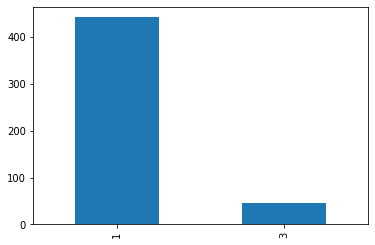

already done


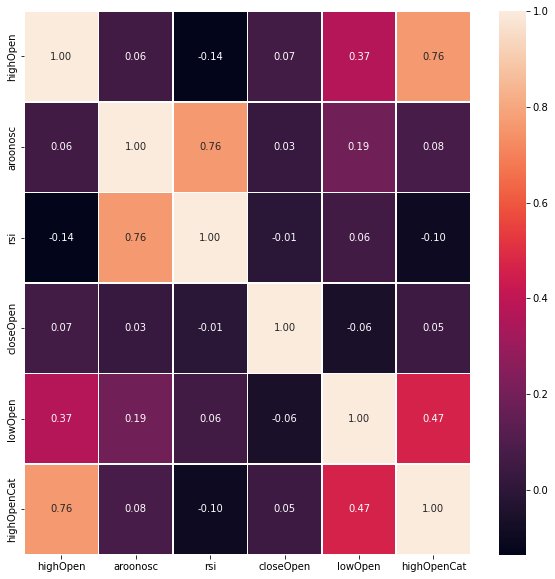

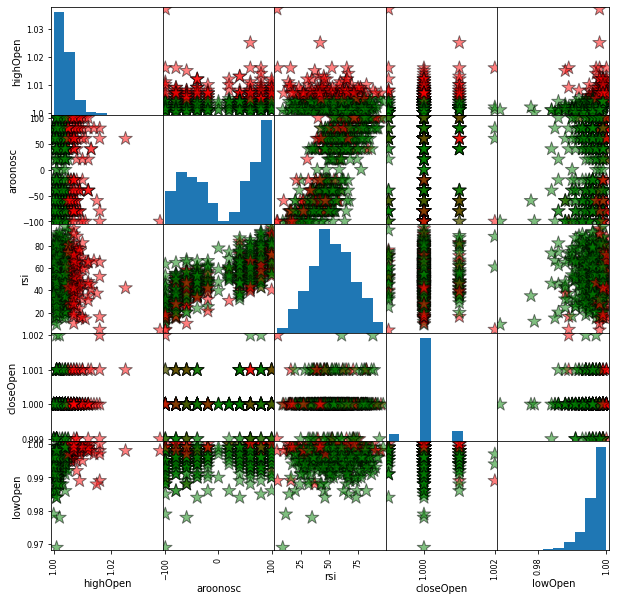

In [8]:
#print('DS2 before drop: ', ds2)
final = ds2.dropna()
final = np.round_(final,3)
#print(final.tail(5))
#print(final.info())

final["closeOpenCat"].astype(np.int).value_counts().plot(kind="bar")
print('Counts: ', (final["closeOpenCat"].astype(np.int).value_counts()))
plt.show()



study = final
try:
  study = study.drop(["volume","closeOpen","highOpen","lowOpen"],axis=1)
except:
  print('already done')
#print(study)
try:
  final2 = data_ind[['highOpen','aroonosc','rsi','closeOpen','lowOpen','highOpenCat']]
except:
  print('done')
#print(final2)

f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(final2.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)
plt.show()
               
color_list = ['red' if (i==3) else 'green' for i in final2.loc[:,'highOpenCat']]
pd.plotting.scatter_matrix(final2.loc[:, final2.columns != 'highOpenCat'],
                                       c=color_list,
                                       figsize= [10,10],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()






finalHigh = pd.DataFrame()
finalHigh = final.drop(['lowOpenCat','closeOpenCat'], axis=1)
finalLow = pd.DataFrame()
finalLow = final.drop(['highOpenCat','closeOpenCat'], axis=1)
finalClose = pd.DataFrame()
finalClose = final.drop(['highOpenCat','lowOpenCat'], axis=1)



# final
# train test split
from sklearn.model_selection import train_test_split
# High
x,y = finalHigh.loc[:,finalHigh.columns != 'highOpenCat'], finalHigh.loc[:,'highOpenCat']
x_trainHigh,x_testHigh,y_trainHigh,y_testHigh = train_test_split(x,y,test_size = 0.3,random_state = 1)
y_trainHigh = y_trainHigh.astype(np.int)
y_testHigh = y_testHigh.astype(np.int)

# Low
x,y = finalLow.loc[:,finalLow.columns != 'lowOpenCat'], finalLow.loc[:,'lowOpenCat']
x_trainLow, x_testLow, y_trainLow, y_testLow = train_test_split(x,y,test_size = 0.3,random_state = 1)
y_trainLow = y_trainLow.astype(np.int)
y_testLow = y_testLow.astype(np.int)

# Close
x,y = finalClose.loc[:,finalClose.columns != 'closeOpenCat'], finalClose.loc[:,'closeOpenCat']
x_trainClose,x_testClose,y_trainClose,y_testClose = train_test_split(x,y,test_size = 0.3,random_state = 1)
y_trainClose = y_trainClose.astype(np.int)
y_testClose = y_testClose.astype(np.int)

In [ ]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude):
    
    #rff = KNeighborsClassifier(n_neighbors=k)
    #rff = DecisionTreeClassifier(max_depth=k, random_state=10)
    rff = RandomForestClassifier(max_depth=k, random_state=10)


    # Fit with knn
    rff.fit(x_trainHigh,y_trainHigh)
    #train accuracy
    train_accuracy.append(rff.score(x_trainHigh, y_trainHigh))
    # test accuracy
    test_accuracy.append(rff.score(x_testHigh, y_testHigh))

    # Fit with knn
    #rff.fit(x_trainClose,y_trainClose)
    #train accuracy
    #train_accuracy.append(rff.score(x_trainClose, y_trainClose))
    # test accuracy
    #test_accuracy.append(rff.score(x_testClose, y_testClose))

    # Fit with knn
    #rff.fit(x_trainLow,y_trainLow)
    #train accuracy
    #train_accuracy.append(rff.score(x_trainLow, y_trainLow))
    # test accuracy
    #test_accuracy.append(rff.score(x_testLow, y_testLow))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [ ]:

from tabulate import tabulate
# final
# train test split
from sklearn.model_selection import train_test_split
#x,y = final.loc[:,final.columns != 'highOpenCat'], final.loc[:,'highOpenCat']
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)

#Classifiers

#KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors = 14)

print(tabulate([['prices', float(data_ind['open'].tail(1))]], headers=['Info:', 'open'], tablefmt='grid'))

#random forrest
knnClose = RandomForestClassifier(max_depth=8, random_state=10) 
#knnClose = DecisionTreeClassifier(max_depth=8, random_state=10)
knnClose.fit(x_trainClose,y_trainClose)
prediction = knnClose.predict(x_testClose)
#print('Prediction: {}'.format(prediction))


#knnHigh = DecisionTreeClassifier(max_depth=3, random_state=10)
knnHigh = RandomForestClassifier(max_depth=12, random_state=10)
knnHigh.fit(x_trainHigh,y_trainHigh)
prediction = knnHigh.predict(x_testHigh)
#print('Prediction: {}'.format(prediction))


knnLow = RandomForestClassifier(max_depth=7, random_state=10)
knnLow.fit(x_trainLow,y_trainLow)
prediction = knnLow.predict(x_testLow)
#print('Prediction: {}'.format(prediction))
print(tabulate([['high', (knnHigh.score(x_testHigh,y_testHigh))], ['low',(knnLow.score(x_testLow,y_testLow))], ['close', (knnClose.score(x_testClose,y_testClose))]], headers=['Class:', 'accuracy:'], tablefmt='grid'))




#print(data_ind.tail(1))
#g = data_ind.tail(1) # -> tomorrow value
g = data_ind.iloc[-1:] # -> today's value

try:
  g = g.drop(['date','close','open','low','high', 'highOpenCat','lowOpenCat','closeOpenCat'], axis=1)
  g = g.drop(['avgprice'], axis = 1)
  g = g.drop(['closeOpen','highOpen','lowOpen'], axis=1)

except:
  print('done')

predictionHigh = knnHigh.predict(g)
predictionLow = knnLow.predict(g)
predictionClose = knnClose.predict(g)



#rs = pd.DataFrame()
#rs['highOpenCat'] = y_test
#rs['predictions'] = prediction
#rs.tail(30)

if (predictionHigh == 0):
  high_down = float(data_ind['open'].tail(1))
  high_up = float(data_ind['open'].tail(1))

if (predictionHigh == 1):
  high_down = float(s25*data_ind['open'].tail(1))
  high_up = float(s50*data_ind['open'].tail(1))

if (predictionHigh == 2):
  high_down = float(s50*data_ind['open'].tail(1))
  high_up = float(s75*data_ind['open'].tail(1))

if (predictionHigh == 3):
  high_down = float(s75*data_ind['open'].tail(1))
  #high_up = s50*data_ind['open'].tail(1)
  high_up = ''


#### Low 

if (predictionLow == 0):
  low_down = float(data_ind['open'].tail(1))
  low_up = float(data_ind['open'].tail(1))

if (predictionLow == 1):
  low_down = float(sL25*data_ind['open'].tail(1))
  low_up = float(sL50*data_ind['open'].tail(1))

if (predictionLow == 2):
  low_down = float(sL50*data_ind['open'].tail(1))
  low_up = float(sL75*data_ind['open'].tail(1))

if (predictionLow == 3):
  low_down = float(sL75*data_ind['open'].tail(1))
  #high_up = s50*data_ind['open'].tail(1)
  low_up = ''


##### close
if (predictionClose == 0):
  close_down = float(data_ind['open'].tail(1))
  close_up = float(data_ind['open'].tail(1))

if (predictionClose == 1):
  close_down = float(sC25*data_ind['open'].tail(1))
  close_up = float(sC50*data_ind['open'].tail(1))

if (predictionClose == 2):
  close_down = float(sC50*data_ind['open'].tail(1))
  close_up = float(sC75*data_ind['open'].tail(1))

if (predictionClose == 3):
  close_down = float(sC75*data_ind['open'].tail(1))
  #high_up = s50*data_ind['open'].tail(1)
  close_up = ''



from datetime import date
today = date.today()
targets = pd.DataFrame()
import pandas as pd


a = ('| movement level - Close: ' + str(int(predictionHigh)) + '/3 |')
b = ('| movement level - Low: ' + str(int(predictionLow)) + '/3   |')
c = ('| movement level - High: ' + str(int(predictionClose)) + '/3  |')

print('-'*31)
print(a)
print('='*31)
print(b)
print('='*31)
print(c)
print('-'*31)


d = {
    "info:": ['high', 'low', 'close'],
    'Low limit': [high_down, low_down, close_down],
    'High limit': [high_up, low_up, close_up],
    #'Plage param. 1': ['-', '-', '-'],
    #'Plage param. 2': ['-', '-', '-']
    }
df = pd.DataFrame(data=d)
df.set_index("info:",inplace=True)
df

print(tabulate([['high', high_down, high_up], ['low', low_down, low_up], ['close', close_down, close_up]], headers=['Info:', 'Low Limit', 'High Limit'], tablefmt='grid'))

In [ ]:
#Oanda data
ACCESS_TOKEN = '1aff980e39513183e6db34a85cb4ee3c-85c7d81aa7cd907dd448f56cc2c96e4e'
ACCOUNT_ID = '101-004-18394035-001'
access_token = '1aff980e39513183e6db34a85cb4ee3c-85c7d81aa7cd907dd448f56cc2c96e4e';
accountID = '101-004-18394035-001';
accountID = '101-004-18394035-001'
api = API(access_token='1aff980e39513183e6db34a85cb4ee3c-85c7d81aa7cd907dd448f56cc2c96e4e')
params = {"instruments": "XAU_USD"}
params = {"instruments": "SUGAR_USD"}
params = {"instruments": "XAG_USD"}
r = pricing.PricingInfo(accountID=accountID, params=params)
rv = api.request(r)
asks = float(rv['prices'][0]['asks'][0]['price'])
bids = float(rv['prices'][0]['bids'][0]['price'])
oandaOpen = (asks+bids)/2
rv

In [ ]:
data